In [70]:
import plumed
import matplotlib.pyplot as plt
import os
import MDAnalysis as mda
import numpy as np
import math
import mdtraj as md


This notebook is entirely indebted to the wonderful material from the PLUMED masterclass:

https://www.plumed.org/doc-v2.7/user-doc/html/masterclass-21-5.html

And we thank the authors of the PLUMED software for sharing all of their material opensource


An overview of replica exchange simulations is covered here:

https://manual.gromacs.org/documentation/current/reference-manual/algorithms/replica-exchange.html

In [161]:
# set working directory for all future cells
exercise_dir='/Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/'
data_dir='/Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/repex_diala_300_800/'
outdir=exercise_dir+'output'
os.chdir(exercise_dir)
if not os.path.exists(outdir):
    os.makedirs(outdir)
os.chdir(outdir)

# and check with bash command pwd - note the exclamation mark at the beginning
!pwd
# or in python
os.getcwd()


/Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/output


'/Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/output'

In this exercise we're going to perform replica exchange simulations of our old budy the alanine dipeptide
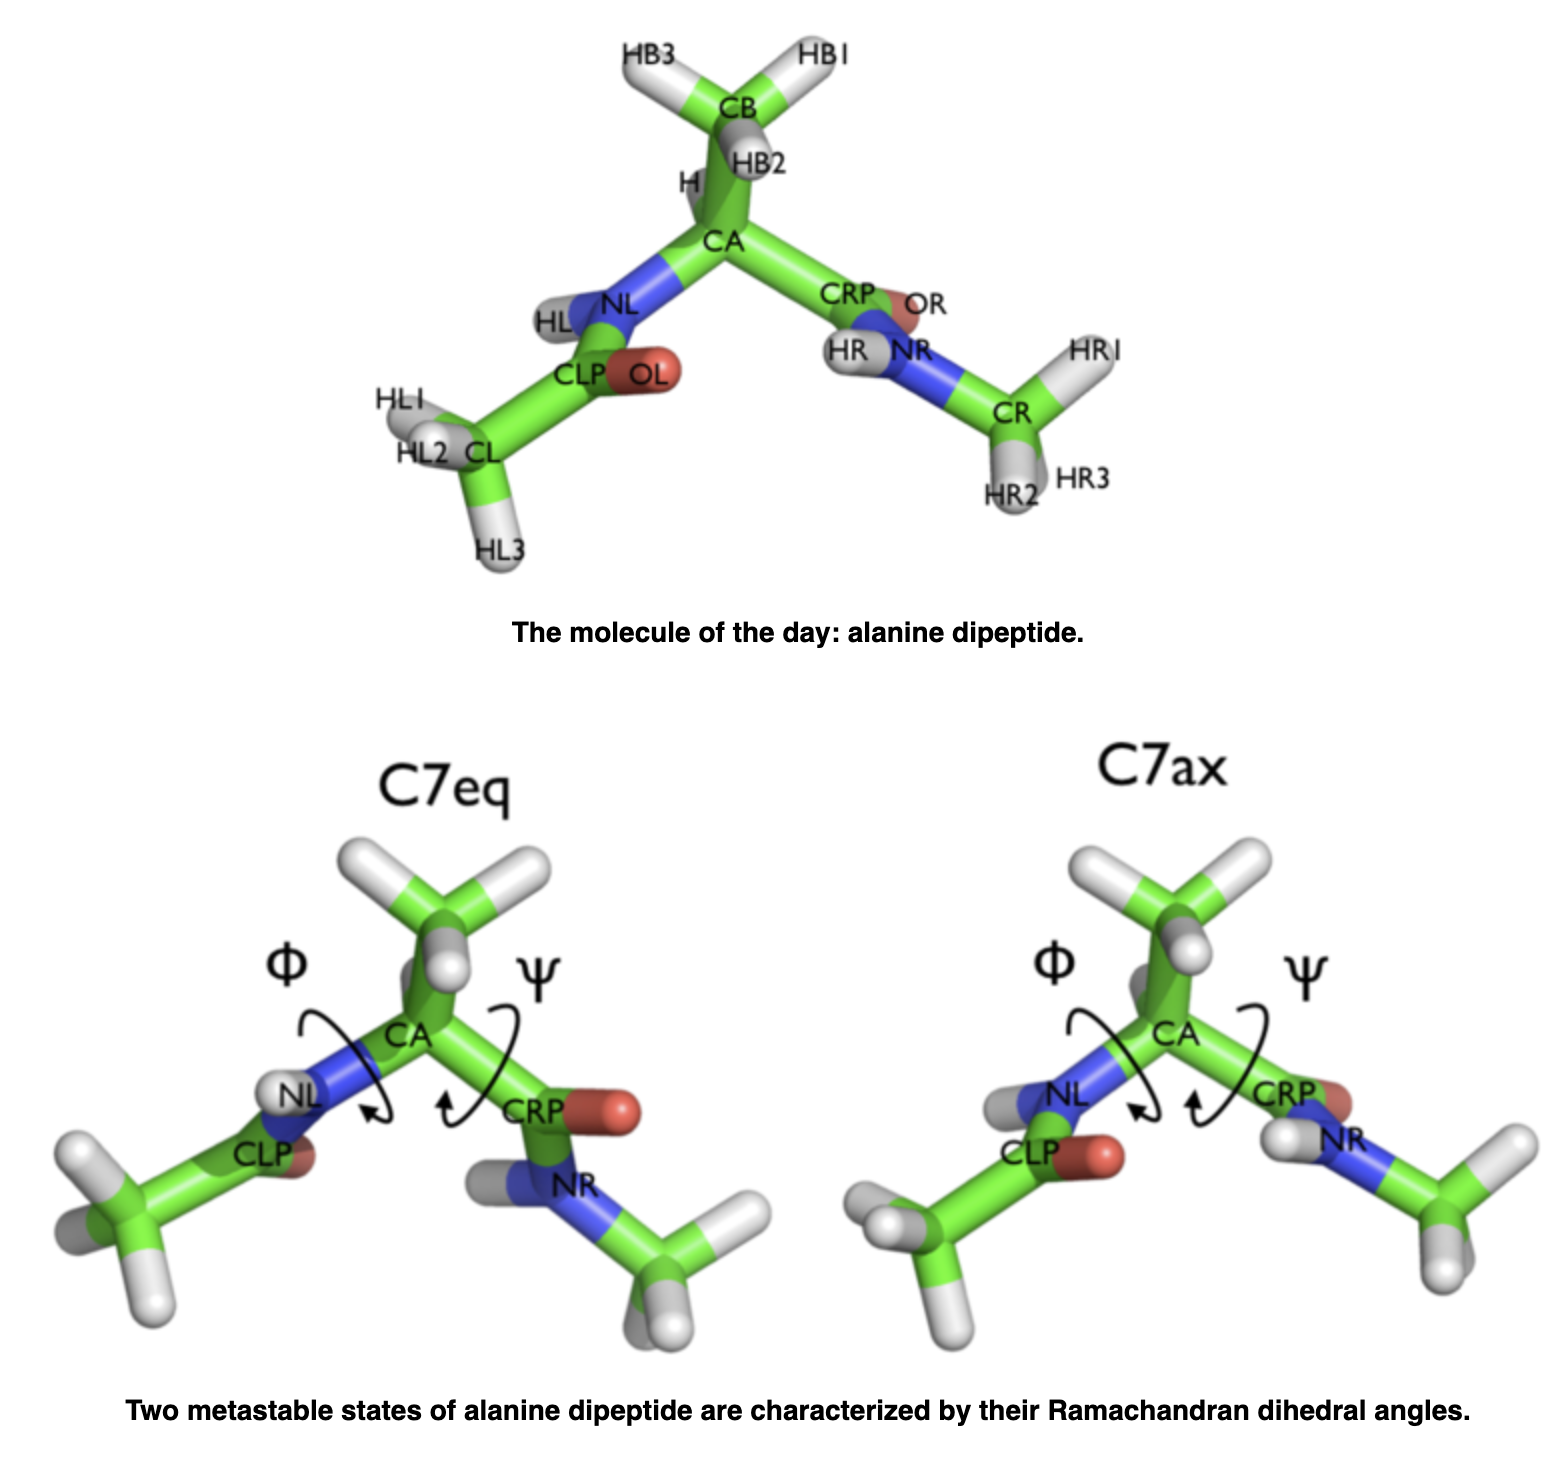

We're going to run simulations of the alanine dipeptide in gromacs, and analyze the simulations with software PLUMED

www.plumed.org

PLUMED is an enhanced sampling plugin that works with many different MD packages to perform enhanced sampling calculations.

Below is an example of plumed input file, which gives PLUMED a reference structure, and tells it what values to analyze (or bias) from the simulation based on that reference structure.  That is a cell that can write out a plumed.dat input file 

#plumed.dat input file

\# Activate MOLINFO functionalities

MOLINFO STRUCTURE=../../data/diala/dialaA.pdb 

\# Compute the backbone dihedral angle phi, defined by atoms C-N-CA-C

\# you should use MOLINFO shortcuts

phi: TORSION ATOMS=@phi-2 

\# Compute the backbone dihedral angle psi, defined by atoms N-CA-C-N

\# here also you should to use MOLINFO shortcuts

psi: TORSION ATOMS=@psi-2 

\# Print the two collective variables on COLVAR file every step
PRINT ARG=phi,psi FILE=COLVAR STRIDE=1 
EOF

In [162]:
%%bash
# prepare PLUMED input file for analysis
cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=/Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/repex_diala_300_800/data/diala/dialaA.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C-N-CA-C
# you should use MOLINFO shortcuts
phi: TORSION ATOMS=@phi-2 
# Compute the backbone dihedral angle psi, defined by atoms N-CA-C-N
# here also you should to use MOLINFO shortcuts
psi: TORSION ATOMS=@psi-2 
# Print the two collective variables on COLVAR file every step
PRINT ARG=phi,psi FILE=COLVAR STRIDE=1 
EOF

In [163]:
if not os.path.exists('600_confA'):
 os.mkdir('600_confA')
if not os.path.exists('600_confB'):
 os.mkdir('600_confB')
if not os.path.exists('repex_300'):
 os.mkdir('repex_300')
if not os.path.exists('repex_400'):
 os.mkdir('repex_400')
if not os.path.exists('repex_500'):
 os.mkdir('repex_500')
if not os.path.exists('repex_600'):
 os.mkdir('repex_600')
if not os.path.exists('repex_700'):
 os.mkdir('repex_700')
if not os.path.exists('repex_800'):
 os.mkdir('repex_800')


In [164]:
cd /Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/repex_diala_300_800/600K/confA

/Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/repex_diala_300_800/600K/confA


Here we run gromacs to generate the outputs of 2 600K MD simulations from each conformation of aladipeptide, and compute phi/psi

In [165]:
#!gmx mdrun -s md.A.600.tpr -nsteps 10000000 
!plumed driver --plumed ../plumed.dat --mf_xtc traj_comp.xtc



DRIVER: Found molfile format trajectory xtc with name traj_comp.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Mar  8 2021 at 17:47:58
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/plumed
PLUMED: For installed feature, see /Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 22
PLUMED: File suffix: 
PLUMED: FILE: ../plumed.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named dialaA.pdb contains 1 chains 
PLUMED:   chain named   contains residues 1 to 3 and atoms 1 to 22 
PLUMED: Action TORSION
PLUMED:   with label phi
PLUMED:   between atoms 5 7 9 15
PLU

In [166]:
cd /Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/repex_diala_300_800/600K/confB


/Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/repex_diala_300_800/600K/confB


In [167]:
!plumed driver --plumed ../plumed.dat --mf_xtc traj_comp.xtc



DRIVER: Found molfile format trajectory xtc with name traj_comp.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Mar  8 2021 at 17:47:58
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/plumed
PLUMED: For installed feature, see /Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 22
PLUMED: File suffix: 
PLUMED: FILE: ../plumed.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED: 
PLUMED: 
PLUMED: ################################################################################
PLUMED: 
PLUMED: 
PLUMED: +++ PLUMED error
PLUMED: +++ at GenericMolInfo.cpp:84, function PLMD::Gene

Now we do the same for the other reference structure

In [168]:
os.chdir(exercise_dir)



In [169]:
#Here we are going to read the plumed COLVAR (Collective Variable) files as pandas dataframes
# import PLUMED COLVAR files into pandas datasets
dataA=plumed.read_as_pandas(data_dir+"600K/confA/COLVAR")
dataB=plumed.read_as_pandas(data_dir+"600K/confB/COLVAR")
dataA

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/libplumedKernel.dylib" +++


,time,phi,psi
0,0.0,-1.257768,2.877951
1,1.0,-2.016594,1.481432
2,2.0,-1.729561,0.156347
3,3.0,-0.902981,-0.725236
4,4.0,-1.456229,0.779855
...,...,...,...
99996,99996.0,-1.827595,1.280884
99997,99997.0,-1.222706,1.784831
99998,99998.0,-2.005174,2.104088
99999,99999.0,-2.387387,2.828127


Std phi run_A: 0.9543335880946713


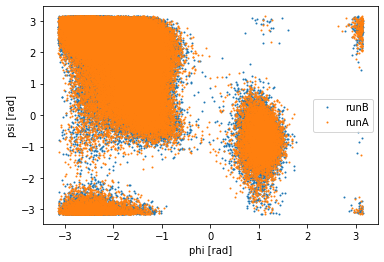

In [170]:
#Here we are going to read the plumed COLVAR (Collective Variable) files as pandas dataframes
# plot phi vs psi
plt.plot(dataB["phi"],dataB["psi"],'o',ms=1, label="runB")
plt.plot(dataA["phi"],dataA["psi"],'o',ms=1, label="runA")
# x-y axis labels
plt.xlabel("phi [rad]")
plt.ylabel("psi [rad]")
plt.legend()
# calculate Gaussian sigma
print("Std phi run_A:",np.std(dataA["phi"]))
#print("Std phi run_B:",np.std(dataB["phi"]))

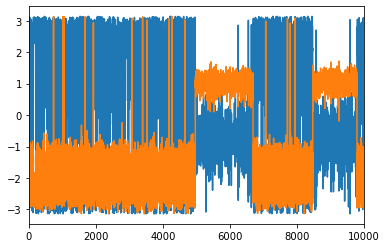

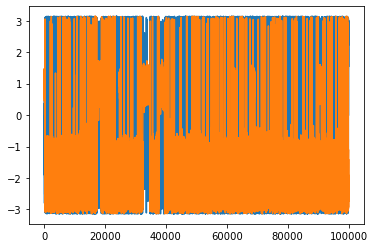

In [171]:
plt.plot(dataA["psi"])
plt.plot(dataA["phi"])
plt.xlim(0,10000)
plt.show()
plt.clf()
plt.plot(dataB["psi"])
plt.plot(dataB["phi"])
#plt.xlim(0,30000)
plt.show()

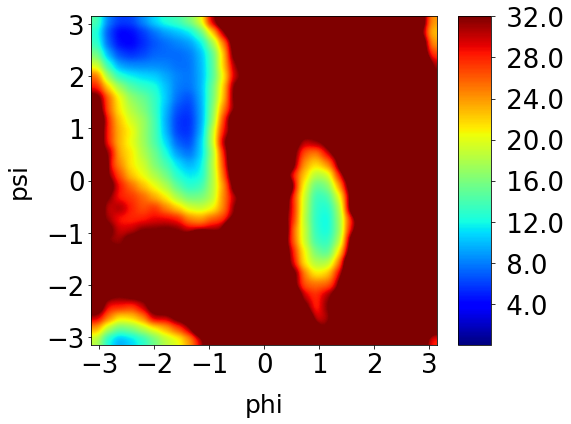

<Figure size 432x288 with 0 Axes>

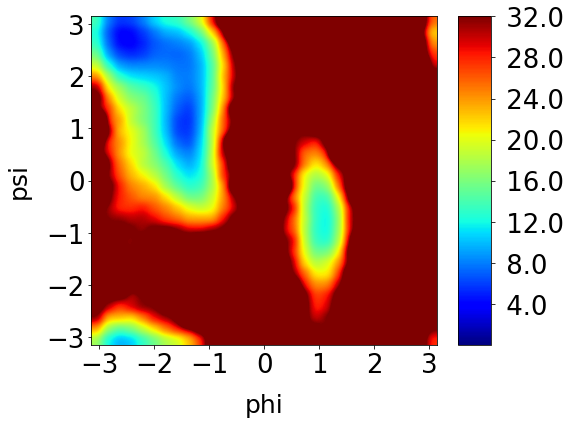

In [172]:
#Lets Plot the Free Energy Surfaces of Each Simulation
def free_energy(a, b, T, y0, ymax, x0, xmax):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], normed=True, weights=None)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(k*T)*free_energy
    return free_energy, xedges, yedges

k=0.00831446261

dG,xedges,yedges=free_energy(dataA["psi"],dataA["phi"], 600, -3.14, 3.14, -3.14, 3.14)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 4, 8, 12, 16, 20,24,28,32]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=32.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
plt.clf()


dG,xedges,yedges=free_energy(dataB["psi"],dataB["phi"], 600, -3.14, 3.14, -3.14, 3.14)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 4, 8, 12, 16, 20,24,28,32]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=32.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()

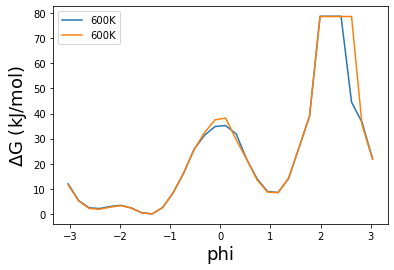

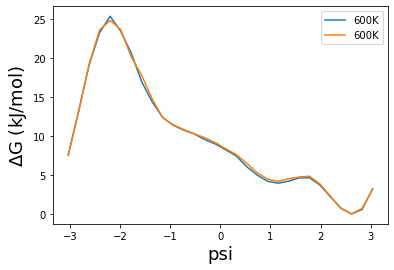

<Figure size 432x288 with 0 Axes>

In [173]:
def free_energy_1D(a,T,x0,xmax,bins):
  free_energy,xedges=np.histogram(a,bins=bins,range=[x0,xmax],density=True,weights=None)
  max=np.max(free_energy)  
  free_energy=np.log(free_energy+.0000001)
  free_energy=-k*T*(free_energy-np.log(max+.0000001))
  xcenters= xedges[:-1] + np.diff(xedges)/2
  return free_energy,xcenters

k=0.00831446261


# plot free energies
dG,centers=free_energy_1D(dataA["phi"],600,-3.14,3.14,30)
plt.plot(centers,dG,label='600K')
#dG,centers=free_energy_1D(dataA["phi"],300,-3.14,3.14,30)
#plt.plot(centers,dG,label='300K')
dG,centers=free_energy_1D(dataB["phi"],600,-3.14,3.14,30)
plt.plot(centers,dG,label='600K')
#plt.plot(data_psi["psi"],data_psi["ffpsi"]-min(data_psi["ffpsi"]),label="PLUMED Reweight")
plt.xlabel('phi',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 
plt.legend()
plt.show()
plt.clf()

dG,centers=free_energy_1D(dataA["psi"],600,-3.14,3.14,30)
plt.plot(centers,dG,label='600K')
#dG,centers=free_energy_1D(dataA["psi"],kt300,-3.14,3.14,30)
#plt.plot(centers,dG,label='300K')
dG,centers=free_energy_1D(dataB["psi"],600,-3.14,3.14,30)
plt.plot(centers,dG,label='600K')
#plt.plot(data_psi["psi"],data_psi["ffpsi"]-min(data_psi["ffpsi"]),label="PLUMED Reweight")
plt.xlabel('psi',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 
plt.legend()
plt.show()
plt.clf()

In [181]:
#Now Lets Calculate Phi/Psi for the REPEX trajectories
import mdtraj as md
diala_pdb=data_dir+'data/diala/dialaA.pdb'
trj_300=data_dir+'0/remd.xtc'
trj_400=data_dir+'1/remd.xtc'
trj_500=data_dir+'2/remd.xtc'
trj_600=data_dir+'3/remd.xtc'
trj_700=data_dir+'4/remd.xtc'
trj_800=data_dir+'5/remd.xtc'

trj300 = md.load(trj_300, top=diala_pdb,stride=1)
indices_phi, phis = md.compute_phi(trj300)
indices_psi, psis = md.compute_psi(trj300)
phi300=phis[:,0]
psi300=psis[:,0]

trj400 = md.load(trj_400, top=diala_pdb,stride=1)
indices_phi, phis = md.compute_phi(trj400)
indices_psi, psis = md.compute_psi(trj400)
phi400=phis[:,0]
psi400=psis[:,0]

trj500 = md.load(trj_500, top=diala_pdb,stride=1)
indices_phi, phis = md.compute_phi(trj500)
indices_psi, psis = md.compute_psi(trj500)
phi500=phis[:,0]
psi500=psis[:,0]

trj600 = md.load(trj_600, top=diala_pdb,stride=1)
indices_phi, phis = md.compute_phi(trj600)
indices_psi, psis = md.compute_psi(trj600)
phi600=phis[:,0]
psi600=psis[:,0]

trj700 = md.load(trj_700, top=diala_pdb,stride=1)
indices_phi, phis = md.compute_phi(trj700)
indices_psi, psis = md.compute_psi(trj700)
phi700=phis[:,0]
psi700=psis[:,0]


trj800 = md.load(trj_800, top=diala_pdb,stride=1)
indices_phi, phis = md.compute_phi(trj800)
indices_psi, psis = md.compute_psi(trj800)
phi800=phis[:,0]
psi800=psis[:,0]


In [175]:
phipsi_dict = { 'phi': { },
          'psi': { }}
phipsi_dict['phi'][300]=phi300
phipsi_dict['phi'][400]=phi400
phipsi_dict['phi'][500]=phi500
phipsi_dict['phi'][600]=phi600
phipsi_dict['phi'][700]=phi700
phipsi_dict['phi'][700]=phi800

phipsi_dict['psi'][300]=psi300
phipsi_dict['psi'][400]=psi400
phipsi_dict['psi'][500]=psi500
phipsi_dict['psi'][600]=psi600
phipsi_dict['psi'][700]=psi700
phipsi_dict['psi'][700]=psi800


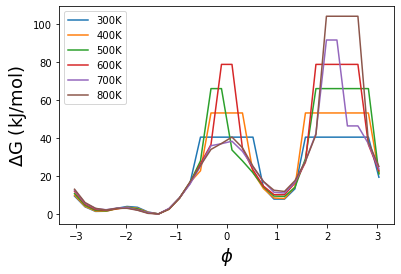

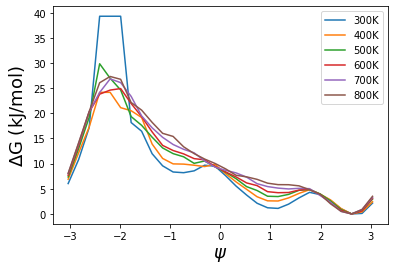

<Figure size 432x288 with 0 Axes>

In [176]:
def free_energy_1D(a,T,x0,xmax,bins):
  free_energy,xedges=np.histogram(a,bins=bins,range=[x0,xmax],density=True,weights=None)
  max=np.max(free_energy)  
  free_energy=np.log(free_energy+.0000001)
  free_energy=-k*T*(free_energy-np.log(max+.0000001))
  xcenters= xedges[:-1] + np.diff(xedges)/2
  return free_energy,xcenters

k=0.00831446261

dG,centers=free_energy_1D(phi300,300,-3.14,3.14,30)
plt.plot(centers,dG,label='300K')
dG,centers=free_energy_1D(phi400,400,-3.14,3.14,30)
plt.plot(centers,dG,label='400K')
dG,centers=free_energy_1D(phi500,500,-3.14,3.14,30)
plt.plot(centers,dG,label='500K')
dG,centers=free_energy_1D(phi600,600,-3.14,3.14,30)
plt.plot(centers,dG,label='600K')
dG,centers=free_energy_1D(phi700,700,-3.14,3.14,30)
plt.plot(centers,dG,label='700K')
dG,centers=free_energy_1D(phi800,800,-3.14,3.14,30)
plt.plot(centers,dG,label='800K')
#plt.plot(data_psi["psi"],data_psi["ffpsi"]-min(data_psi["ffpsi"]),label="PLUMED Reweight")
plt.xlabel('$\phi$',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 
plt.legend()
plt.show()
plt.clf()

dG,centers=free_energy_1D(psi300,300,-3.14,3.14,30)
plt.plot(centers,dG,label='300K')
dG,centers=free_energy_1D(psi400,400,-3.14,3.14,30)
plt.plot(centers,dG,label='400K')
dG,centers=free_energy_1D(psi500,500,-3.14,3.14,30)
plt.plot(centers,dG,label='500K')
dG,centers=free_energy_1D(psi600,600,-3.14,3.14,30)
plt.plot(centers,dG,label='600K')
dG,centers=free_energy_1D(psi700,700,-3.14,3.14,30)
plt.plot(centers,dG,label='700K')
dG,centers=free_energy_1D(psi800,800,-3.14,3.14,30)
plt.plot(centers,dG,label='800K')
#plt.plot(data_psi["psi"],data_psi["ffpsi"]-min(data_psi["ffpsi"]),label="PLUMED Reweight")
plt.xlabel('$\psi$',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 
plt.legend()
plt.show()
plt.clf()

Std phi run_A: 0.9543335880946713


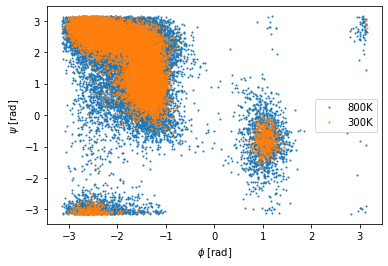

In [177]:
# plot phi vs psi
plt.plot(phi800,psi800,'o',ms=1, label="800K")
plt.plot(phi300,psi300,'o',ms=1, label="300K")

# x-y axis labels
plt.xlabel("$\phi$ [rad]")
plt.ylabel("$\psi$ [rad]")
plt.legend()
# calculate Gaussian sigma
print("Std phi run_A:",np.std(dataA["phi"]))
#print("Std phi run_B:",np.std(dataB["phi"]))

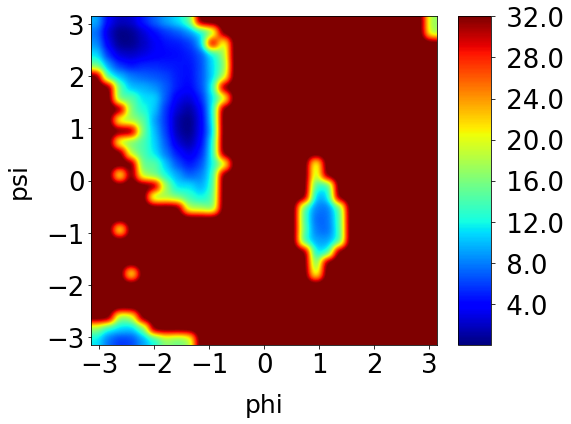

<Figure size 432x288 with 0 Axes>

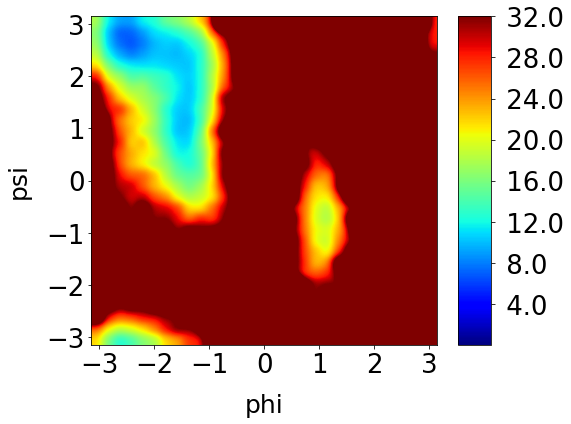

<Figure size 432x288 with 0 Axes>

In [178]:
#Lets Plot the Free Energy Surfaces of Each Simulation
def free_energy(a, b, T, y0, ymax, x0, xmax):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], normed=True, weights=None)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.00831446261*T)*free_energy
    return free_energy, xedges, yedges

k=0.00831446261

dG,xedges,yedges=free_energy(psi300,phi300, 300, -3.14, 3.14, -3.14, 3.14)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 4, 8, 12, 16, 20,24,28,32]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=32.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
plt.clf()

dG,xedges,yedges=free_energy(psi800,phi800, 800, -3.14, 3.14, -3.14, 3.14)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 4, 8, 12, 16, 20,24,28,32]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=32.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
plt.clf()

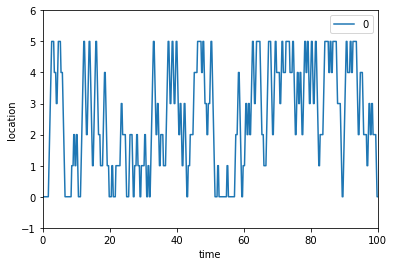

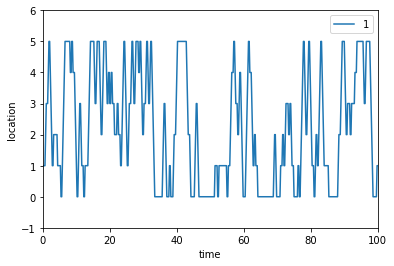

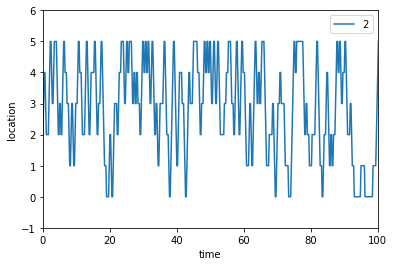

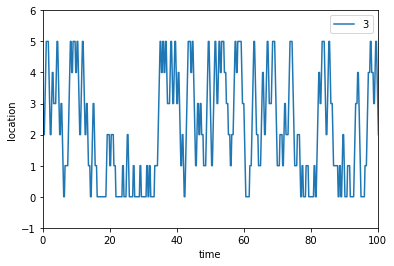

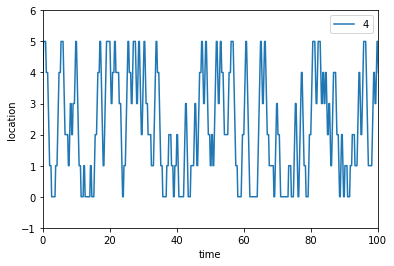

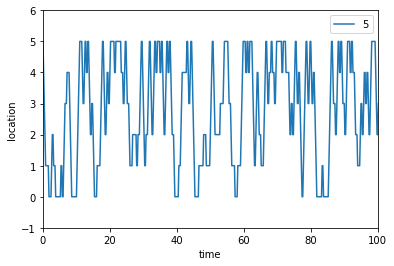

In [605]:
#Lets Look at the Demultiplexed Trajectories
#Replica Temperature (What Temperature Run is Each Replica In)

replica_temp=np.loadtxt(data_dir+"0/replica_temp.xvg")
replica_temp
for i in range(6):
        plt.plot(replica_temp[:,0],replica_temp[:,i+1],label=str(i))
        plt.xlabel("time")
        plt.ylabel("location")
        plt.ylim((-1,6))
        plt.legend()
        plt.xlim(0,100)
        plt.show()

In [606]:
#CAN WE CALCULATE A ROUND TRIP TIME?

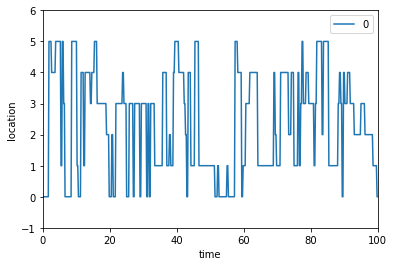

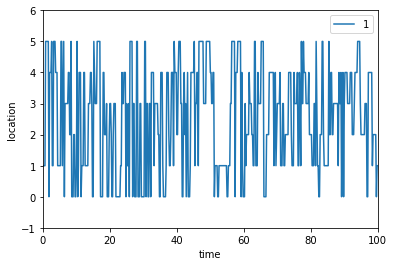

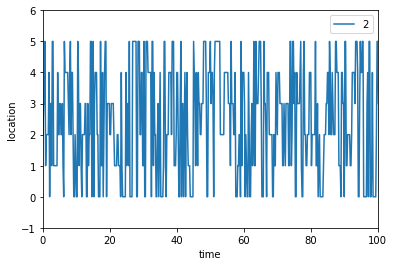

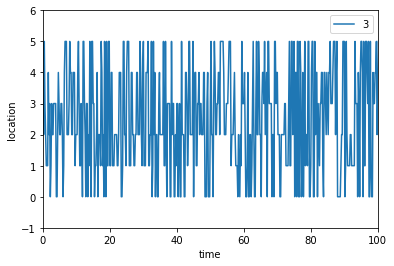

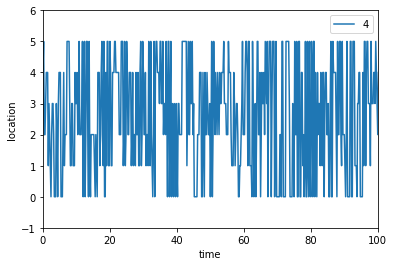

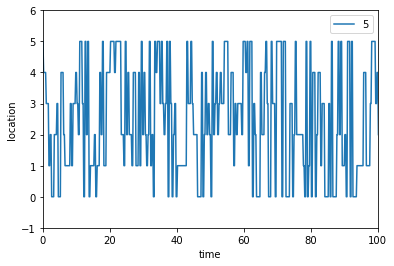

In [602]:
#Replica Index (Which Starting Replica is in each Temperature Rung)
replica_index=np.loadtxt(data_dir+"0/replica_index.xvg")
for i in range(6):
        plt.plot(replica_index[:,0],replica_index[:,i+1],label=str(i))
        plt.xlabel("time")
        plt.ylabel("location")
        plt.ylim((-1,6))
        plt.legend()
        plt.xlim(0,100)
        plt.show()


***STATISTICAL ERRORS FROM MD TRAJECTORIES***

Now Lets Review Some Concepts of Error Analysis following the wonderful PLUMED masterclass:
https://www.plumed.org/doc-v2.7/user-doc/html/masterclass-21-2.html

In statistics, the quantity known as the ensemble average in statistical mechanics is referred to as the expectation of the random variable's distribution. The expectation of a random variable is often esimated by taking multiple identical samples from the distribution, Xi and computing a sample mean as follows:

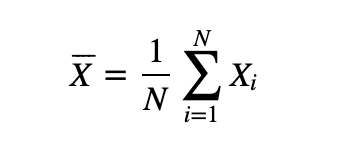

-0.008147916180059101 -0.0070672561610983925


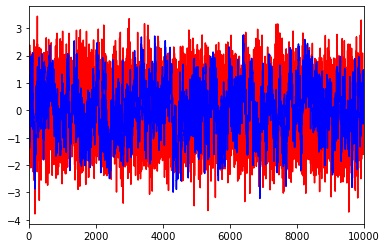

In [299]:
#Lets Generate Some Correlated and Uncorrelated Timeseries and Calculate Their Averages
uncorrelated_data=[]
for i in range(0,10001):
    uncorrelated_data.append(np.random.normal(0,1))

correlated_data=[]
prev = np.random.uniform(0,1)
for i in range(0,10001):
    new = (0.95*prev + 2*np.random.uniform(0,1) - 1)
    correlated_data.append(new/2.0)
    prev=new

plt.plot(uncorrelated_data,c='r',label='Uncorrelated')
plt.plot(correlated_data,c='b',label='Correlated')
plt.xlim(0,10000)

print(np.average(uncorrelated_data),np.average(correlated_data))

In [550]:
correlated_data=np.loadtxt('/Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/repex_diala_300_800/correlated.data.dat')
uncorrelated_data=np.loadtxt('/Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/repex_diala_300_800/uncorrelated.data.dat')

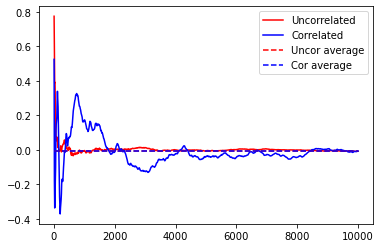

In [551]:
#Lets Calculate the Averages of Each Data Series as a Function of time
frames=len(correlated_data)

ave_cor=[]
ave_uncor=[]
frame=[]
for i in range(0,frames,10):
  frame.append(i)
  ave_cor.append(np.average(correlated_data[0:i]))
  ave_uncor.append(np.average(uncorrelated_data[0:i]))

plt.plot(frame,ave_uncor,label='Uncorrelated',c='r')
plt.plot(frame,ave_cor,label='Correlated',c='b')
plt.plot([0,frames],[np.average(uncorrelated_data),np.average(uncorrelated_data)],c='r',label='Uncor average',linestyle='dashed')
plt.plot([0,frames],[np.average(correlated_data),np.average(correlated_data)],c='b',label='Cor average',linestyle='dashed')
plt.legend()

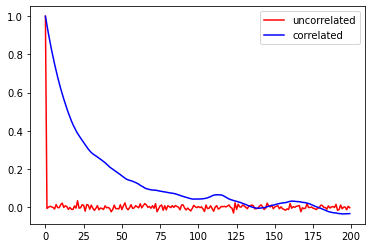

In [552]:
#It sure does a much longer time for average of the correlated data to converge to the true average
#Lets calculate and ACF and quantify how long it takes for each datapoint in the series to become indepdent from previos datapoints
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)
lags=range(200)
acf1=autocorr1(uncorrelated_data,lags)
acf2=autocorr1(correlated_data,lags)

plt.plot(lags,acf1,color='r',label='uncorrelated')
plt.plot(lags,acf2,color='b',label='correlated')
plt.legend()
plt.show()

This is telling us that each sample from the uncorrelated time series is indepdent, but we have many fewer effective independent samples in our correlated data. 


Therefore if we want to report an error on our estimate of average value, it might be apropriate to simply calculated the variance and corresponding standard error of the uncorrelated data, but this is definitely not apropriate for the correlated data. 

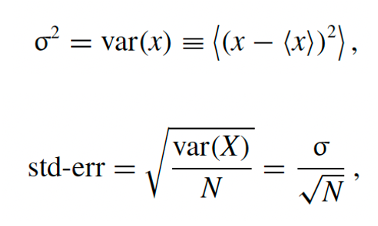




In [553]:
def variance(data):
    ave=np.average(data)
    var= np.average((data-ave)**2)
    std=var**0.5
    return var,std

var_cor,std_cor=variance(correlated_data)
var_uncor,std_uncor=variance(uncorrelated_data)
print("Uncorrelated Data Average: %.4f Variance: %.4f Std-err: %.4f "%(np.average(uncorrelated_data),var_uncor,std_uncor/(frames)**.5))
print("Correlated Data Average: %.4f Variance: %.4f Std-err????: %.4f "%(np.average(correlated_data),var_cor,std_cor/(frames)**.5))

Uncorrelated Data Average: -0.0081 Variance: 0.9953 Std-err: 0.0100 
Correlated Data Average: -0.0071 Variance: 0.9083 Std-err????: 0.0095 


/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encounte

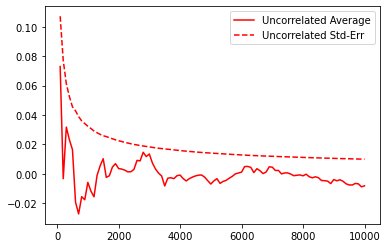

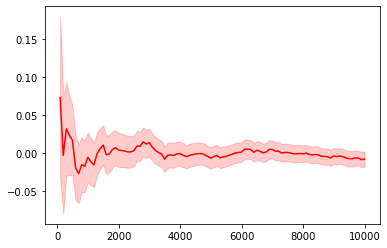

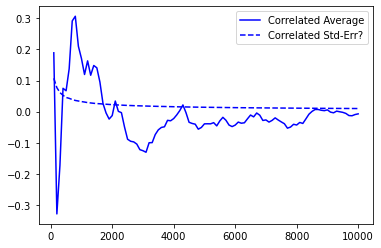

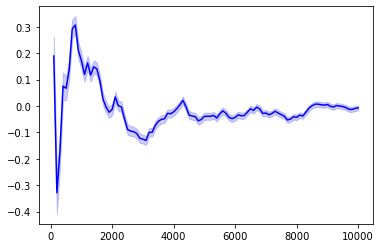

In [554]:
#Lets Look at the Standard Error of the Our Estimate of the Average of the Uncorrelated Data

#Lets Calculate the Averages of Each Data Series as a Function of time

ave_cor=[]
ave_uncor=[]
var_cor=[]
var_uncor=[]
stderr_cor=[]
stderr_uncor=[]
frame=[]
for i in range(0,frames,100):
  frame.append(i)
  ave_cor.append(np.average(correlated_data[0:i]))
  ave_uncor.append(np.average(uncorrelated_data[0:i]))
  var_cor.append(np.var(correlated_data[0:i]))
  var_uncor.append(np.var(uncorrelated_data[0:i]))
  stderr_cor.append(np.sqrt(np.var(correlated_data[0:i])/i))
  stderr_uncor.append(np.sqrt(np.var(uncorrelated_data[0:i])/i))


plt.plot(frame,ave_uncor,label='Uncorrelated Average',c='r')
#plt.plot(frame,var_uncor,label='Uncorrelated Variance',c='r',linestyle='dotted')
plt.plot(frame,stderr_uncor,label='Uncorrelated Std-Err',c='r',linestyle='dashed')

#plt.plot(frame,ave_cor,label='Correlated Average',c='b')
#plt.plot(frame,stderr_uncor,label='Correlated Std-Err',c='b',linestyle='dashed')

#plt.plot([0,frames],[np.average(uncorrelated_data),np.average(uncorrelated_data)],c='r',label='Uncor average',linestyle='dashed')
#plt.plot([0,frames],[np.average(correlated_data),np.average(correlated_data)],c='b',label='Cor average',linestyle='dashed')
plt.legend()
plt.show()
plt.clf()


ave_upper=np.asarray(ave_uncor)+np.asarray(stderr_uncor)
ave_lower=np.asarray(ave_uncor)-np.asarray(stderr_uncor)

#KD_upper=err_upper
plt.plot(frame,ave_uncor,label='Uncorrelated Average',c='r')
plt.fill_between(frame, ave_upper, ave_lower, color='red', alpha=0.2)
plt.show()



plt.plot(frame,ave_cor,label='Correlated Average',c='b')
#plt.plot(frame,var_uncor,label='Uncorrelated Variance',c='b',linestyle='dotted')
plt.plot(frame,stderr_uncor,label='Correlated Std-Err?',c='b',linestyle='dashed')

#plt.plot(frame,ave_cor,label='Correlated Average',c='b')
#plt.plot(frame,stderr_uncor,label='Correlated Std-Err',c='b',linestyle='dashed')

#plt.plot([0,frames],[np.average(uncorrelated_data),np.average(uncorrelated_data)],c='r',label='Uncor average',linestyle='dashed')
#plt.plot([0,frames],[np.average(correlated_data),np.average(correlated_data)],c='b',label='Cor average',linestyle='dashed')
plt.legend()
plt.show()
plt.clf()


ave_upper=np.asarray(ave_cor)+np.asarray(stderr_cor)
ave_lower=np.asarray(ave_cor)-np.asarray(stderr_cor)

#KD_upper=err_upper
plt.plot(frame,ave_cor,label='Correlated Average',c='b')
plt.fill_between(frame, ave_upper, ave_lower, color='b', alpha=0.2)
plt.show()

We need to come up with a better error estimate for our correlated data that accounts for the fact that each data point in the time series is not independent!

For this we use "Block Averaging" to remove correlations in the data and come up with more realistic error estimates.



[0, 100]


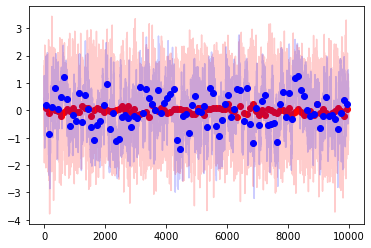

In [555]:
#Now Lets Split Our Trajectory Up Into Chunks or "Blocks" of Equal sizes
def chunkIt(a, num):
    avg = a / float(num)
    out = []
    last = 0.0
    while last < a-1:
        out.append([int(last),int(last+avg)])
        last += avg
    return out

indices= chunkIt(frames,100)
print(indices[0])
cor_ave=[]
uncor_ave=[]
frame=[]
for i in range(0,len(indices)):
  cor_ave.append(np.average(correlated_data[indices[i][0]:indices[i][1]]))
  uncor_ave.append(np.average(uncorrelated_data[indices[i][0]:indices[i][1]]))
  frame.append(np.average(indices[i]))

#uncor_ave
plt.plot(uncorrelated_data,c='r',label='Uncorrelated',alpha=0.2)
plt.plot(frame,uncor_ave,marker='o',c='r',linestyle='None')

plt.plot(correlated_data,c='b',label='Uncorrelated',alpha=0.2)
plt.plot(frame,cor_ave,marker='o',c='b',linestyle='None')

Block Average Variance (Unorrelated):  0.0109
Block Average Std-Err (Unorrelated):  0.0104
Block Average Variance (Correlated): 0.3467
Block Average Std-Err (Correlated): 0.0589


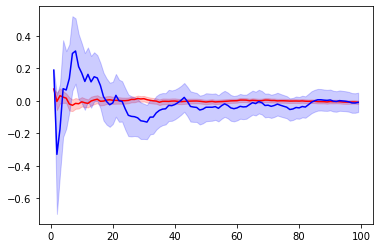

In [557]:
#Now We Can Consider the Variance of Our Block Averages
var_block_cor=np.var(cor_ave)
var_block_uncor=np.var(uncor_ave)
stderr_block_cor=np.sqrt(np.var(cor_ave)/len(cor_ave))
stderr_block_uncor=np.sqrt(np.var(uncor_ave)/len(cor_ave))
print("Block Average Variance (Unorrelated):  %.4f"%var_block_uncor)
print("Block Average Std-Err (Unorrelated):  %.4f"%stderr_block_uncor)

print("Block Average Variance (Correlated): %.4f"%var_block_cor)
print("Block Average Std-Err (Correlated): %.4f"%stderr_block_cor)

#We Can look at the Standard Error of the block averages as a function of blocks


ave_cor=[]
ave_uncor=[]
var_cor=[]
var_uncor=[]
stderr_cor=[]
stderr_uncor=[]
frame=[]
for i in range(0,len(cor_ave)):
  frame.append(i)
  ave_cor.append(np.average(cor_ave[0:i]))
  ave_uncor.append(np.average(uncor_ave[0:i]))
  var_cor.append(np.var(cor_ave[0:i]))
  var_uncor.append(np.var(uncor_ave[0:i]))
  stderr_cor.append(np.sqrt(np.var(cor_ave[0:i])/i))
  stderr_uncor.append(np.sqrt(np.var(uncor_ave[0:i])/i))





ave_upper=np.asarray(ave_uncor)+np.asarray(stderr_uncor)
ave_lower=np.asarray(ave_uncor)-np.asarray(stderr_uncor)
plt.plot(frame,ave_uncor,label='Uncorrelated Average',c='r')
plt.fill_between(frame, ave_upper, ave_lower, color='red', alpha=0.2)

ave_upper=np.asarray(ave_cor)+np.asarray(stderr_cor)
ave_lower=np.asarray(ave_cor)-np.asarray(stderr_cor)

#KD_upper=err_upper
plt.plot(frame,ave_cor,label='Correlated Average',c='b')
plt.fill_between(frame, ave_upper, ave_lower, color='b', alpha=0.2)

plt.show()



Now we Bring it All Together To Compute An Estimate of the Statistical Errors of Correlated Dated Using a Blocking Analysis According to Flyvbjerg & Peterson

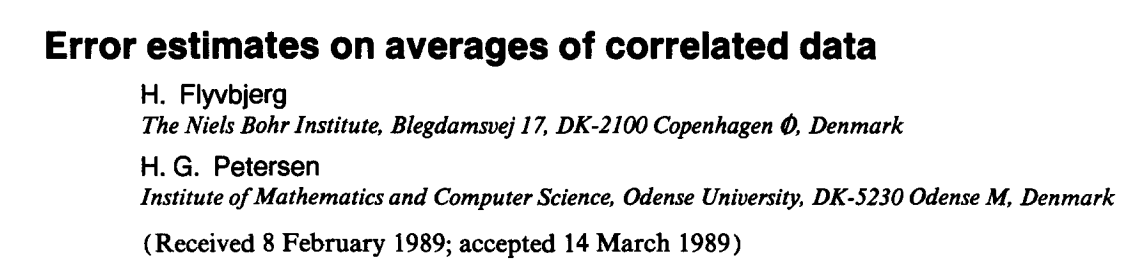

https://aip.scitation.org/doi/10.1063/1.457480

We're going to computer the standard error as a function of block size, and report our estimate of the error when we see our standard error estimate converging

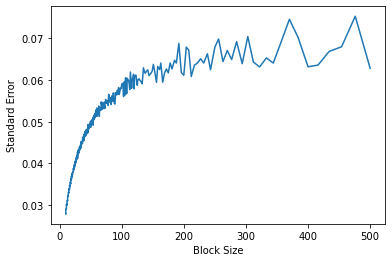

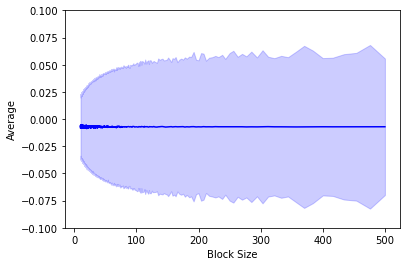

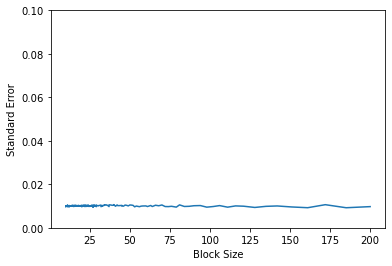

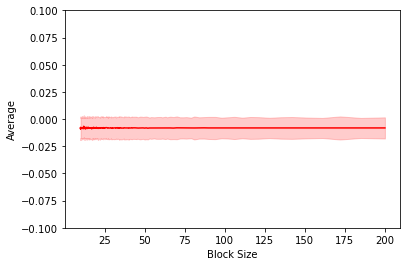

<Figure size 432x288 with 0 Axes>

In [567]:
#Now Lets Split Our Trajectory Up Into Chunks or "Blocks" of Equal sizes
def chunkIt(a, num):
    avg = a / float(num)
    out = []
    last = 0.0
    while last < a-1:
        out.append([int(last),int(last+avg)])
        last += avg
    return out

b_var=[]
b_sd=[]
b_size=[]
b_ave=[]  
b_stderr=[]
n_blocks=1000
for j in range(20,n_blocks,1):
 indices= chunkIt(frames,j)
 ave=[]
 for i in range(0,len(indices)):
  ave.append(np.average(correlated_data[indices[i][0]:indices[i][1]]))
 b_ave.append(np.average(ave))
 b_var.append(np.var(ave))
 b_size.append(indices[0][1]-indices[0][0])
 b_stderr.append(np.sqrt(np.var(ave)/j))

plt.plot(b_size,b_stderr)
plt.xlabel("Block Size")
plt.ylabel("Standard Error")
plt.show()
plt.clf()

upper=np.asarray(b_ave)+np.asarray(b_stderr)
lower=np.asarray(b_ave)-np.asarray(b_stderr)
plt.plot(b_size,b_ave,color='b')
plt.fill_between(b_size, upper, lower, color='b', alpha=0.2)

plt.xlabel("Block Size")
plt.ylabel("Average")
plt.ylim(-.1,.1)
plt.show()
plt.clf()


b_var=[]
b_sd=[]
b_size=[]
b_ave=[]  
b_stderr=[]
n_blocks=1000
for j in range(50,n_blocks,4):
 indices= chunkIt(frames,j)
 ave=[]
 for i in range(0,len(indices)):
  ave.append(np.average(uncorrelated_data[indices[i][0]:indices[i][1]]))
 b_ave.append(np.average(ave))
 b_var.append(np.var(ave))
 b_size.append(indices[0][1]-indices[0][0])
 b_stderr.append(np.sqrt(np.var(ave)/j))

plt.plot(b_size,b_stderr)
plt.xlabel("Block Size")
plt.ylabel("Standard Error")
plt.ylim(0,.1)
plt.show()
plt.clf()

upper=np.asarray(b_ave)+np.asarray(b_stderr)
lower=np.asarray(b_ave)-np.asarray(b_stderr)
plt.plot(b_size,b_ave,color='r')
plt.fill_between(b_size, upper, lower, color='r', alpha=0.2)

plt.xlabel("Block Size")
plt.ylabel("Average")
plt.ylim(-.1,.1)
plt.show()
plt.clf()

BlockTuple(block=0, ndata=10001, mean=array(-0.00706726), cov=array(0.90842643), std_err=array(0.00953066), std_err_err=array(6.73919728e-05))
BlockTuple(block=1, ndata=5000, mean=array(-0.00714931), cov=array(0.88705338), std_err=array(0.01331956), std_err_err=array(0.00013321))
BlockTuple(block=2, ndata=2500, mean=array(-0.00714931), cov=array(0.85638778), std_err=array(0.01850824), std_err_err=array(0.0002618))
BlockTuple(block=3, ndata=1250, mean=array(-0.00714931), cov=array(0.80250429), std_err=array(0.02533779), std_err_err=array(0.00050696))
BlockTuple(block=4, ndata=625, mean=array(-0.00714931), cov=array(0.71743624), std_err=array(0.03388064), std_err_err=array(0.00095906))
BlockTuple(block=5, ndata=312, mean=array(-0.00847234), cov=array(0.60423058), std_err=array(0.04400723), std_err_err=array(0.00176453))
BlockTuple(block=6, ndata=156, mean=array(-0.00847234), cov=array(0.42387811), std_err=array(0.05212646), std_err_err=array(0.00296058))
BlockTuple(block=7, ndata=78, mea

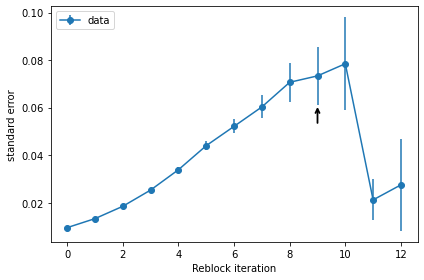

data                                                  
             mean standard error standard error error optimal block
reblock                                                            
0       -0.007067       0.009531             0.000067              
1       -0.007149       0.013320             0.000133              
2       -0.007149       0.018508             0.000262              
3       -0.007149       0.025338             0.000507              
4       -0.007149       0.033881             0.000959              
5       -0.008472       0.044007             0.001765              
6       -0.008472       0.052126             0.002961              
7       -0.008472       0.060296             0.004859              
8       -0.008472       0.070648             0.008104              
9       -0.013258       0.073341             0.012223      <---    
10      -0.002387       0.078454             0.019613              
11      -0.038612       0.021186             0.008649              
12      -0.038612       0.027512             0.019454

In [569]:
import pandas as pd
reblock_data = pyblock.blocking.reblock(np.asarray(correlated_data))
for reblock_iter in reblock_data:
    print(reblock_iter)
    
opt = pyblock.blocking.find_optimal_block(len(correlated_data), reblock_data)
print(opt)
print(reblock_data[opt[0]])

data_pd=pd.Series(correlated_data)
(data_length, reblock_data, covariance)=pyblock.pd_utils.reblock(data_pd)
pyblock.plot.plot_reblocking(reblock_data);
reblock_data

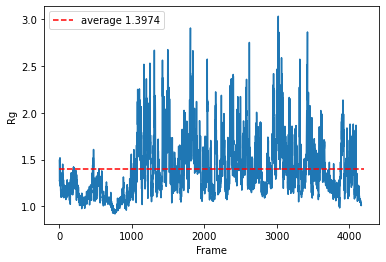

In [570]:
timeseries_dir='/Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/repex_diala_300_800/timeseries/'
rg=np.loadtxt(timeseries_dir+'Rgyr-CA.dat')
plt.plot(rg_anton)
rg_ave=np.average(rg)
plt.plot([0,4200],[rg_ave,rg_ave],c='r',label='average %.4f'%rg_ave,linestyle='dashed')
plt.xlabel('Frame')
plt.ylabel('Rg')
plt.legend()

[0, 41]


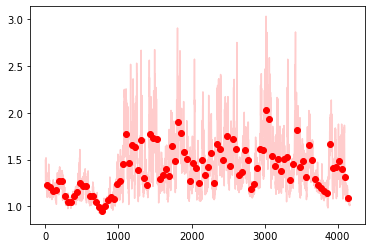

In [572]:
#Now Lets Split Our Trajectory Up Into Chunks or "Blocks" of Equal sizes
def chunkIt(a, num):
    avg = a / float(num)
    out = []
    last = 0.0
    while last < a-1:
        out.append([int(last),int(last+avg)])
        last += avg
    return out

frames=len(rg)
indices= chunkIt(frames,100)
print(indices[0])
cor_ave=[]
frame=[]
for i in range(0,len(indices)):
  cor_ave.append(np.average(rg[indices[i][0]:indices[i][1]]))
  frame.append(np.average(indices[i]))

#uncor_ave
plt.plot(rg,c='r',label='Uncorrelated',alpha=0.2)
plt.plot(frame,cor_ave,marker='o',c='r',linestyle='None')

Block Average Variance: 0.0535
Block Average Std-Err: 0.0231


/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encounte

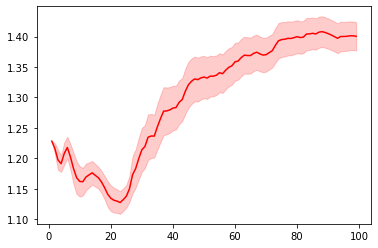

In [573]:
#Now We Can Consider the Variance of Our Block Averages
var_block_cor=np.var(cor_ave)
stderr_block_cor=np.sqrt(np.var(cor_ave)/len(cor_ave))

print("Block Average Variance: %.4f"%var_block_cor)
print("Block Average Std-Err: %.4f"%stderr_block_cor)

#We Can look at the Standard Error of the block averages as a function of blocks


ave_cor=[]
var_cor=[]
stderr_cor=[]
frame=[]
for i in range(0,len(cor_ave)):
  frame.append(i)
  ave_cor.append(np.average(cor_ave[0:i]))
  var_cor.append(np.var(cor_ave[0:i]))
  stderr_cor.append(np.sqrt(np.var(cor_ave[0:i])/i))


ave_upper=np.asarray(ave_cor)+np.asarray(stderr_cor)
ave_lower=np.asarray(ave_cor)-np.asarray(stderr_cor)
plt.plot(frame,ave_cor,label='Correlated Average',c='r')
plt.fill_between(frame, ave_upper, ave_lower, color='r', alpha=0.2)

plt.show()


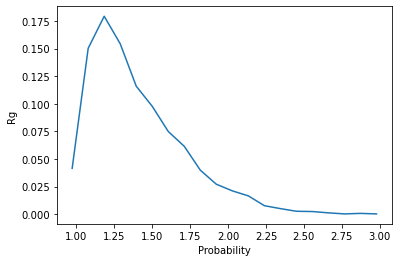

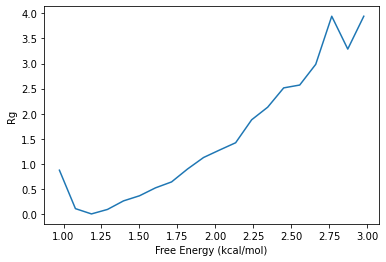

<Figure size 432x288 with 0 Axes>

In [574]:
histo, xedges=np.histogram(rg,bins=20,range=[np.min(rg),np.max(rg)])
xcenters= xedges[:-1] + np.diff(xedges)/2
histonorm=histo/np.sum(histo)
plt.plot(xcenters,histonorm) 
plt.xlabel('Probability')
plt.ylabel('Rg')
plt.show()
plt.clf()
  
free_energy=np.log(histonorm)
max=np.max(histonorm)  
#kb in kcal/mol
k=0.001987
T=300
free_energy=-(k*T)*(free_energy-np.log(max))

plt.plot(xcenters,free_energy) 
plt.xlabel('Free Energy (kcal/mol)')
plt.ylabel('Rg')
plt.show()
plt.clf()

/var/folders/n6/2_qx6kgx25vcj876yc4xmmqw0000gp/T/ipykernel_77978/2721308898.py:24: RuntimeWarning: invalid value encountered in true_divide
  ferr = -(0.001987*T)*(error / average)


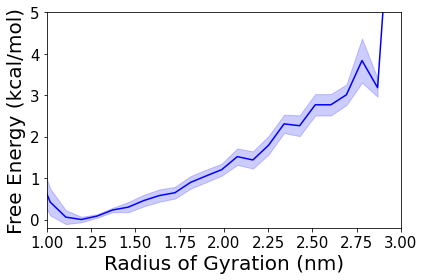

In [575]:
import seaborn as sns

def free_energy_1D_blockerror(a,T,x0,xmax,bins,blocks):
  histo,xedges=np.histogram(a,bins=bins,range=[x0,xmax],density=True,weights=None)
  max=np.max(histo)  
  #free_energy=-(0.001987*T)*np.log(histo)
  free_energy=-(0.001987*T)*np.log(histo+.000001)
  free_energy=free_energy-np.min(free_energy)
  xcenters= xedges[:-1] + np.diff(xedges)/2
  Ind=chunkIt(len(a),blocks)
  block_size=(Ind[0][1]-Ind[0][0])
  #print("Block Size:", block_size,"Blocks:",blocks)
  hist_blocks=[]
  for i in range(0,len(Ind)):
   block_data=a[Ind[i][0]:Ind[i][1]]
   hist,binedges=np.histogram(block_data,bins=bins,range=[x0,xmax],density=True,weights=None)
   hist_blocks.append(hist)
  hist_blocks=np.array(hist_blocks)
  average=np.average(hist_blocks,axis=0)
  variance=np.var(hist_blocks,axis=0)
  N=len(hist_blocks)
  error = np.sqrt( variance / N ) 
  #ferr = (error / average)
  ferr = -(0.001987*T)*(error / average)
  return free_energy,xcenters,ferr


dG,bin_centers,ferr=free_energy_1D_blockerror(rg, 300, 0.8, 3.0,25,5)
sns.lineplot(x=bin_centers,y=dG,color='blue')
plt.fill_between(bin_centers, dG-ferr, dG+ferr, color='blue', alpha=0.2)
plt.ylim(-0.2, 5)
plt.xlim(1.0, 3.0)
plt.xlabel('Radius of Gyration (nm)', size=20)
plt.ylabel('Free Energy (kcal/mol)', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='15')
plt.yticks(size='15')
plt.tight_layout()
np.savetxt(outdir+'rg.dG.err.dat',np.column_stack((bin_centers, dG,ferr)))
plt.tight_layout()
plt.savefig('%s/Rg.dG.pdf'%outdir)
plt.show()


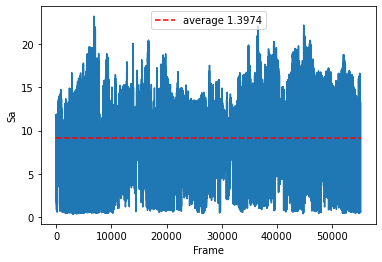

In [576]:
timeseries_dir='/Users/paulrobustelli/Desktop/CHEM.101.6/Lab6_Repex_BlockErrors/repex_diala_300_800/timeseries/'
Sa=np.loadtxt(timeseries_dir+'Sa_total.dat')
frames=len(Sa)
plt.plot(Sa)
Sa_ave=np.average(Sa)
plt.plot([0,frames],[Sa_ave,Sa_ave],c='r',label='average %.4f'%rg_ave,linestyle='dashed')
plt.xlabel('Frame')
plt.ylabel("Sa")
plt.legend()

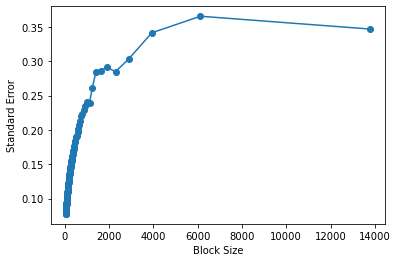

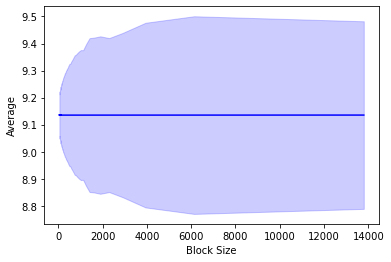

<Figure size 432x288 with 0 Axes>

In [578]:
#Now Lets Split Our Trajectory Up Into Chunks or "Blocks" of Equal sizes
def chunkIt(a, num):
    avg = a / float(num)
    out = []
    last = 0.0
    while last < a-1:
        out.append([int(last),int(last+avg)])
        last += avg
    return out

b_var=[]
b_sd=[]
b_size=[]
b_ave=[]  
b_stderr=[]
n_blocks=1000
for j in range(4,n_blocks,5):
 indices= chunkIt(frames,j)
 ave=[]
 for i in range(0,len(indices)):
  ave.append(np.average(Sa[indices[i][0]:indices[i][1]]))
 b_ave.append(np.average(ave))
 b_var.append(np.var(ave))
 b_size.append(indices[0][1]-indices[0][0])
 b_stderr.append(np.sqrt(np.var(ave)/j))

plt.plot(b_size,b_stderr,marker='o')
plt.xlabel("Block Size")
plt.ylabel("Standard Error")
plt.show()
plt.clf()

upper=np.asarray(b_ave)+np.asarray(b_stderr)
lower=np.asarray(b_ave)-np.asarray(b_stderr)
plt.plot(b_size,b_ave,color='b')
plt.fill_between(b_size, upper, lower, color='b', alpha=0.2)

plt.xlabel("Block Size")
plt.ylabel("Average")
plt.show()
plt.clf()

BlockTuple(block=0, ndata=55157, mean=array(9.13543507), cov=array(21.14735604), std_err=array(0.01958068), std_err_err=array(5.89544159e-05))
BlockTuple(block=1, ndata=27578, mean=array(9.13558904), cov=array(16.27314418), std_err=array(0.0242915), std_err_err=array(0.00010343))
BlockTuple(block=2, ndata=13789, mean=array(9.13558904), cov=array(12.95382816), std_err=array(0.03065016), std_err_err=array(0.00018457))
BlockTuple(block=3, ndata=6894, mean=array(9.13582896), cov=array(10.47437933), std_err=array(0.0389788), std_err_err=array(0.00033198))
BlockTuple(block=4, ndata=3447, mean=array(9.13582896), cov=array(8.51058952), std_err=array(0.04968888), std_err_err=array(0.00059853))
BlockTuple(block=5, ndata=1723, mean=array(9.13593562), cov=array(6.98886328), std_err=array(0.06368844), std_err_err=array(0.00108525))
BlockTuple(block=6, ndata=861, mean=array(9.13695614), cov=array(5.92608651), std_err=array(0.08296261), std_err_err=array(0.00200041))
BlockTuple(block=7, ndata=430, me

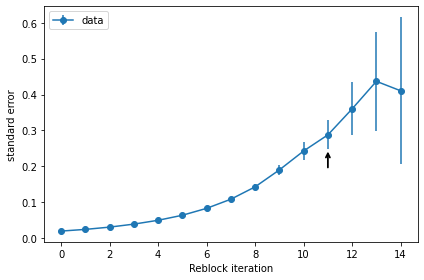

data                                                  
             mean standard error standard error error optimal block
reblock                                                            
0        9.135435       0.019581             0.000059              
1        9.135589       0.024292             0.000103              
2        9.135589       0.030650             0.000185              
3        9.135829       0.038979             0.000332              
4        9.135829       0.049689             0.000599              
5        9.135936       0.063688             0.001085              
6        9.136956       0.082963             0.002000              
7        9.136370       0.108397             0.003701              
8        9.136370       0.142825             0.006904              
9        9.143915       0.190087             0.013055              
10       9.176242       0.242725             0.023801              
11       9.192907       0.287632             0.040677      <---    
12       9.192907       0.360043             0.073493              
13       9.006775       0.436805             0.138130              
14       9.006775       0.410478             0.205239

In [580]:
import pandas as pd
reblock_data = pyblock.blocking.reblock(Sa)
for reblock_iter in reblock_data:
    print(reblock_iter)
    
opt = pyblock.blocking.find_optimal_block(len(rg), reblock_data)
print(opt)
print(reblock_data[opt[0]])

data_pd=pd.Series(Sa)
(data_length, reblock_data, covariance)=pyblock.pd_utils.reblock(data_pd)
pyblock.plot.plot_reblocking(reblock_data);
reblock_data

We can now calculate the probability of each value, and convert to a free energy 
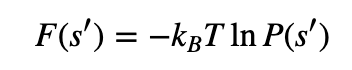

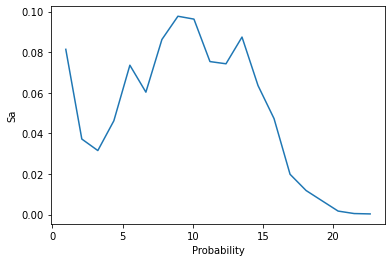

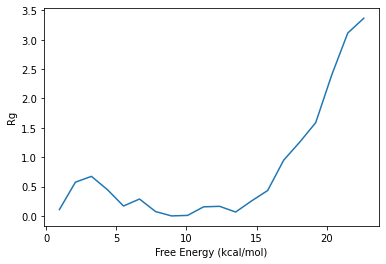

<Figure size 432x288 with 0 Axes>

In [581]:
histo, xedges=np.histogram(Sa,bins=20,range=[np.min(Sa),np.max(Sa)])
xcenters= xedges[:-1] + np.diff(xedges)/2
histonorm=histo/np.sum(histo)
plt.plot(xcenters,histonorm) 
plt.xlabel('Probability')
plt.ylabel('Sa')
plt.show()
plt.clf()
  
free_energy=np.log(histonorm)
max=np.max(histonorm)  
#kb in kcal/mol
k=0.001987
T=300
free_energy=-(k*T)*(free_energy-np.log(max))

plt.plot(xcenters,free_energy) 
plt.xlabel('Free Energy (kcal/mol)')
plt.ylabel('Rg')
plt.show()
plt.clf()

/var/folders/n6/2_qx6kgx25vcj876yc4xmmqw0000gp/T/ipykernel_77978/1992411095.py:24: RuntimeWarning: invalid value encountered in true_divide
  ferr = -(0.001987*T)*(error / average)


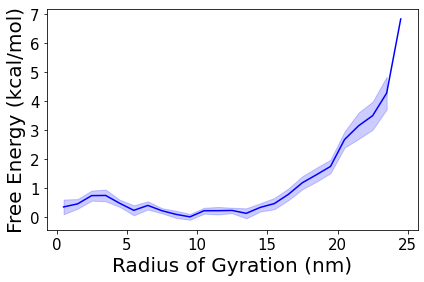

In [587]:
import seaborn as sns

def free_energy_1D_blockerror(a,T,x0,xmax,bins,blocks):
  histo,xedges=np.histogram(a,bins=bins,range=[x0,xmax],density=True,weights=None)
  max=np.max(histo)  
  #free_energy=-(0.001987*T)*np.log(histo)
  free_energy=-(0.001987*T)*np.log(histo+.000001)
  free_energy=free_energy-np.min(free_energy)
  xcenters= xedges[:-1] + np.diff(xedges)/2
  Ind=chunkIt(len(a),blocks)
  block_size=(Ind[0][1]-Ind[0][0])
  #print("Block Size:", block_size,"Blocks:",blocks)
  hist_blocks=[]
  for i in range(0,len(Ind)):
   block_data=a[Ind[i][0]:Ind[i][1]]
   hist,binedges=np.histogram(block_data,bins=bins,range=[x0,xmax],density=True,weights=None)
   hist_blocks.append(hist)
  hist_blocks=np.array(hist_blocks)
  average=np.average(hist_blocks,axis=0)
  variance=np.var(hist_blocks,axis=0)
  N=len(hist_blocks)
  error = np.sqrt( variance / N ) 
  #ferr = (error / average)
  ferr = -(0.001987*T)*(error / average)
  return free_energy,xcenters,ferr


dG,bin_centers,ferr=free_energy_1D_blockerror(Sa, 300, 0,25,25,10)
sns.lineplot(x=bin_centers,y=dG,color='blue')
plt.fill_between(bin_centers, dG-ferr, dG+ferr, color='blue', alpha=0.2)
plt.xlabel('Radius of Gyration (nm)', size=20)
plt.ylabel('Free Energy (kcal/mol)', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='15')
plt.yticks(size='15')
plt.tight_layout()
plt.tight_layout()
plt.show()


/var/folders/n6/2_qx6kgx25vcj876yc4xmmqw0000gp/T/ipykernel_77978/3348090142.py:22: RuntimeWarning: invalid value encountered in true_divide
  ferr = -(k*T)*(error / average)
/var/folders/n6/2_qx6kgx25vcj876yc4xmmqw0000gp/T/ipykernel_77978/3348090142.py:22: RuntimeWarning: invalid value encountered in true_divide
  ferr = -(k*T)*(error / average)


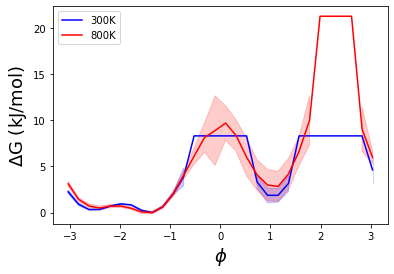

/var/folders/n6/2_qx6kgx25vcj876yc4xmmqw0000gp/T/ipykernel_77978/3348090142.py:22: RuntimeWarning: invalid value encountered in true_divide
  ferr = -(k*T)*(error / average)


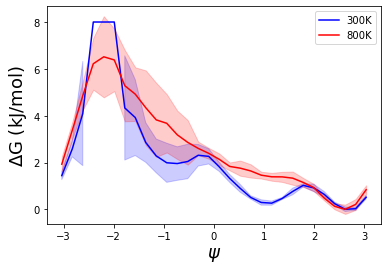

<Figure size 432x288 with 0 Axes>

In [589]:
def free_energy_1D_blockerror(a,T,x0,xmax,bins,blocks):
  histo,xedges=np.histogram(a,bins=bins,range=[x0,xmax],density=True,weights=None)
  max=np.max(histo)  
  #free_energy=-(0.001987*T)*np.log(histo)
  free_energy=-(0.001987*T)*np.log(histo+.000001)
  free_energy=free_energy-np.min(free_energy)
  xcenters= xedges[:-1] + np.diff(xedges)/2
  Ind=chunkIt(len(a),blocks)
  block_size=(Ind[0][1]-Ind[0][0])
  #print("Block Size:", block_size,"Blocks:",blocks)
  hist_blocks=[]
  for i in range(0,len(Ind)):
   block_data=a[Ind[i][0]:Ind[i][1]]
   hist,binedges=np.histogram(block_data,bins=bins,range=[x0,xmax],density=True,weights=None)
   hist_blocks.append(hist)
  hist_blocks=np.array(hist_blocks)
  average=np.average(hist_blocks,axis=0)
  variance=np.var(hist_blocks,axis=0)
  N=len(hist_blocks)
  error = np.sqrt( variance / N ) 
  #ferr = (error / average)
  ferr = -(k*T)*(error / average)
  return free_energy,xcenters,ferr

k=0.00831446261

dG,centers,ferr=free_energy_1D_blockerror(phi300,300,-3.14,3.14,30,5)
sns.lineplot(x=centers,y=dG,color='blue',label='300K')
plt.fill_between(centers, dG-ferr, dG+ferr, color='blue', alpha=0.2)
plt.xlabel('$\phi$',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 

dG,centers,ferr=free_energy_1D_blockerror(phi800,800,-3.14,3.14,30,5)
sns.lineplot(x=centers,y=dG,color='red',label='800K')
plt.fill_between(centers, dG-ferr, dG+ferr, color='red', alpha=0.2)
plt.xlabel('$\phi$',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 
plt.show()
plt.clf()



dG,centers,ferr=free_energy_1D_blockerror(psi300,300,-3.14,3.14,30,5)
sns.lineplot(x=centers,y=dG,color='blue',label='300K')
plt.fill_between(centers, dG-ferr, dG+ferr, color='blue', alpha=0.2)
plt.xlabel('$\psi$',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 

dG,centers,ferr=free_energy_1D_blockerror(psi800,800,-3.14,3.14,30,5)
sns.lineplot(x=centers,y=dG,color='red',label='800K')
plt.fill_between(centers, dG-ferr, dG+ferr, color='red', alpha=0.2)
plt.xlabel('$\psi$',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 
plt.show()
plt.clf()


+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/paulrobustelli/opt/anaconda3/envs/plumed_py3.9/lib/libplumedKernel.dylib" +++
/var/folders/n6/2_qx6kgx25vcj876yc4xmmqw0000gp/T/ipykernel_77978/3348090142.py:22: RuntimeWarning: invalid value encountered in true_divide
  ferr = -(k*T)*(error / average)
/var/folders/n6/2_qx6kgx25vcj876yc4xmmqw0000gp/T/ipykernel_77978/3348090142.py:22: RuntimeWarning: invalid value encountered in true_divide
  ferr = -(k*T)*(error / average)


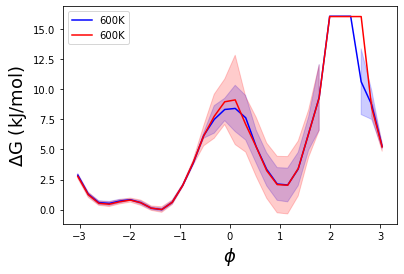

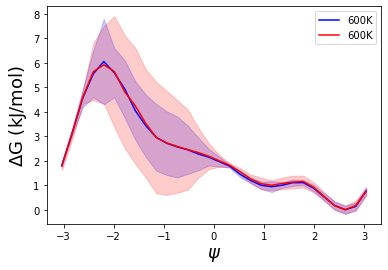

<Figure size 432x288 with 0 Axes>

In [590]:
#Here we are going to read the plumed COLVAR (Collective Variable) files as pandas dataframes
# import PLUMED COLVAR files into pandas datasets
dataA=plumed.read_as_pandas(data_dir+"600K/confA/COLVAR")
dataB=plumed.read_as_pandas(data_dir+"600K/confB/COLVAR")



dG,centers,ferr=free_energy_1D_blockerror(dataA['phi'],600,-3.14,3.14,30,5)
sns.lineplot(x=centers,y=dG,color='blue',label='600K')
plt.fill_between(centers, dG-ferr, dG+ferr, color='blue', alpha=0.2)
plt.xlabel('$\phi$',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 

dG,centers,ferr=free_energy_1D_blockerror(dataB['phi'],600,-3.14,3.14,30,5)
sns.lineplot(x=centers,y=dG,color='red',label='600K')
plt.fill_between(centers, dG-ferr, dG+ferr, color='red', alpha=0.2)
plt.xlabel('$\phi$',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 
plt.show()
plt.clf()



dG,centers,ferr=free_energy_1D_blockerror(dataA['psi'],600,-3.14,3.14,30,5)
sns.lineplot(x=centers,y=dG,color='blue',label='600K')
plt.fill_between(centers, dG-ferr, dG+ferr, color='blue', alpha=0.2)
plt.xlabel('$\psi$',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 

dG,centers,ferr=free_energy_1D_blockerror(dataB['psi'],600,-3.14,3.14,30,5)
sns.lineplot(x=centers,y=dG,color='red',label='600K')
plt.fill_between(centers, dG-ferr, dG+ferr, color='red', alpha=0.2)
plt.xlabel('$\psi$',size=18)
plt.ylabel('$\Delta$G (kJ/mol)',size=18) 
plt.show()
plt.clf()


In [ ]:
#Can we compute an error from the 3D phi/psi surface?

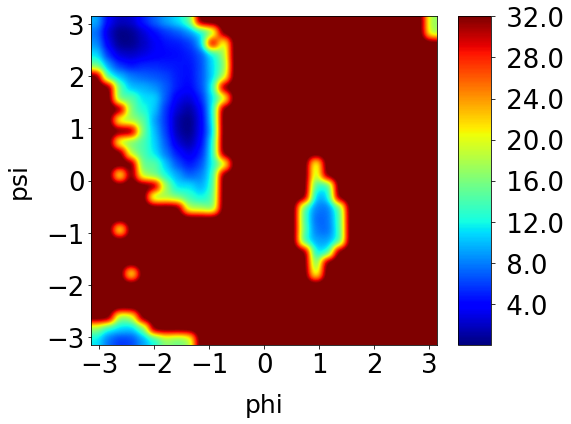

<Figure size 432x288 with 0 Axes>

In [591]:
#Lets Plot the Free Energy Surfaces of Each Simulation
def free_energy(a, b, T, y0, ymax, x0, xmax):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], normed=True, weights=None)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.00831446261*T)*free_energy
    return free_energy, xedges, yedges

k=0.00831446261

dG,xedges,yedges=free_energy(psi300,phi300, 300, -3.14, 3.14, -3.14, 3.14)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 4, 8, 12, 16, 20,24,28,32]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=32.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
plt.clf()

In [592]:
#LETS MAKE AN ERROR ESTIMATE FROM A 2D HISTOGRAM